In [2]:
import math
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
DEBUG = False

In [3]:
cv2.__version__

'3.4.2'

In [ ]:
def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img.copy(), M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

In [17]:
img = cv2.imread('1.cropped/john0002.jpg', 0)
ret,img = cv2.threshold(img, 127, 255, 0)
print(img.shape)

(3300, 2200)


In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(img, kernel, iterations = 7)
dilated = cv2.dilate(img, kernel, iterations = 3)
opening = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel)

Image.fromarray(opening) if DEBUG else None

In [19]:
edges = cv2.Canny(eroded, 100, 300, None, 3)
Image.fromarray(edges) if DEBUG else None

In [20]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 200, minLineLength=50, maxLineGap=30)
len(lines)

69

1.080339207991214
-89.25729133570185


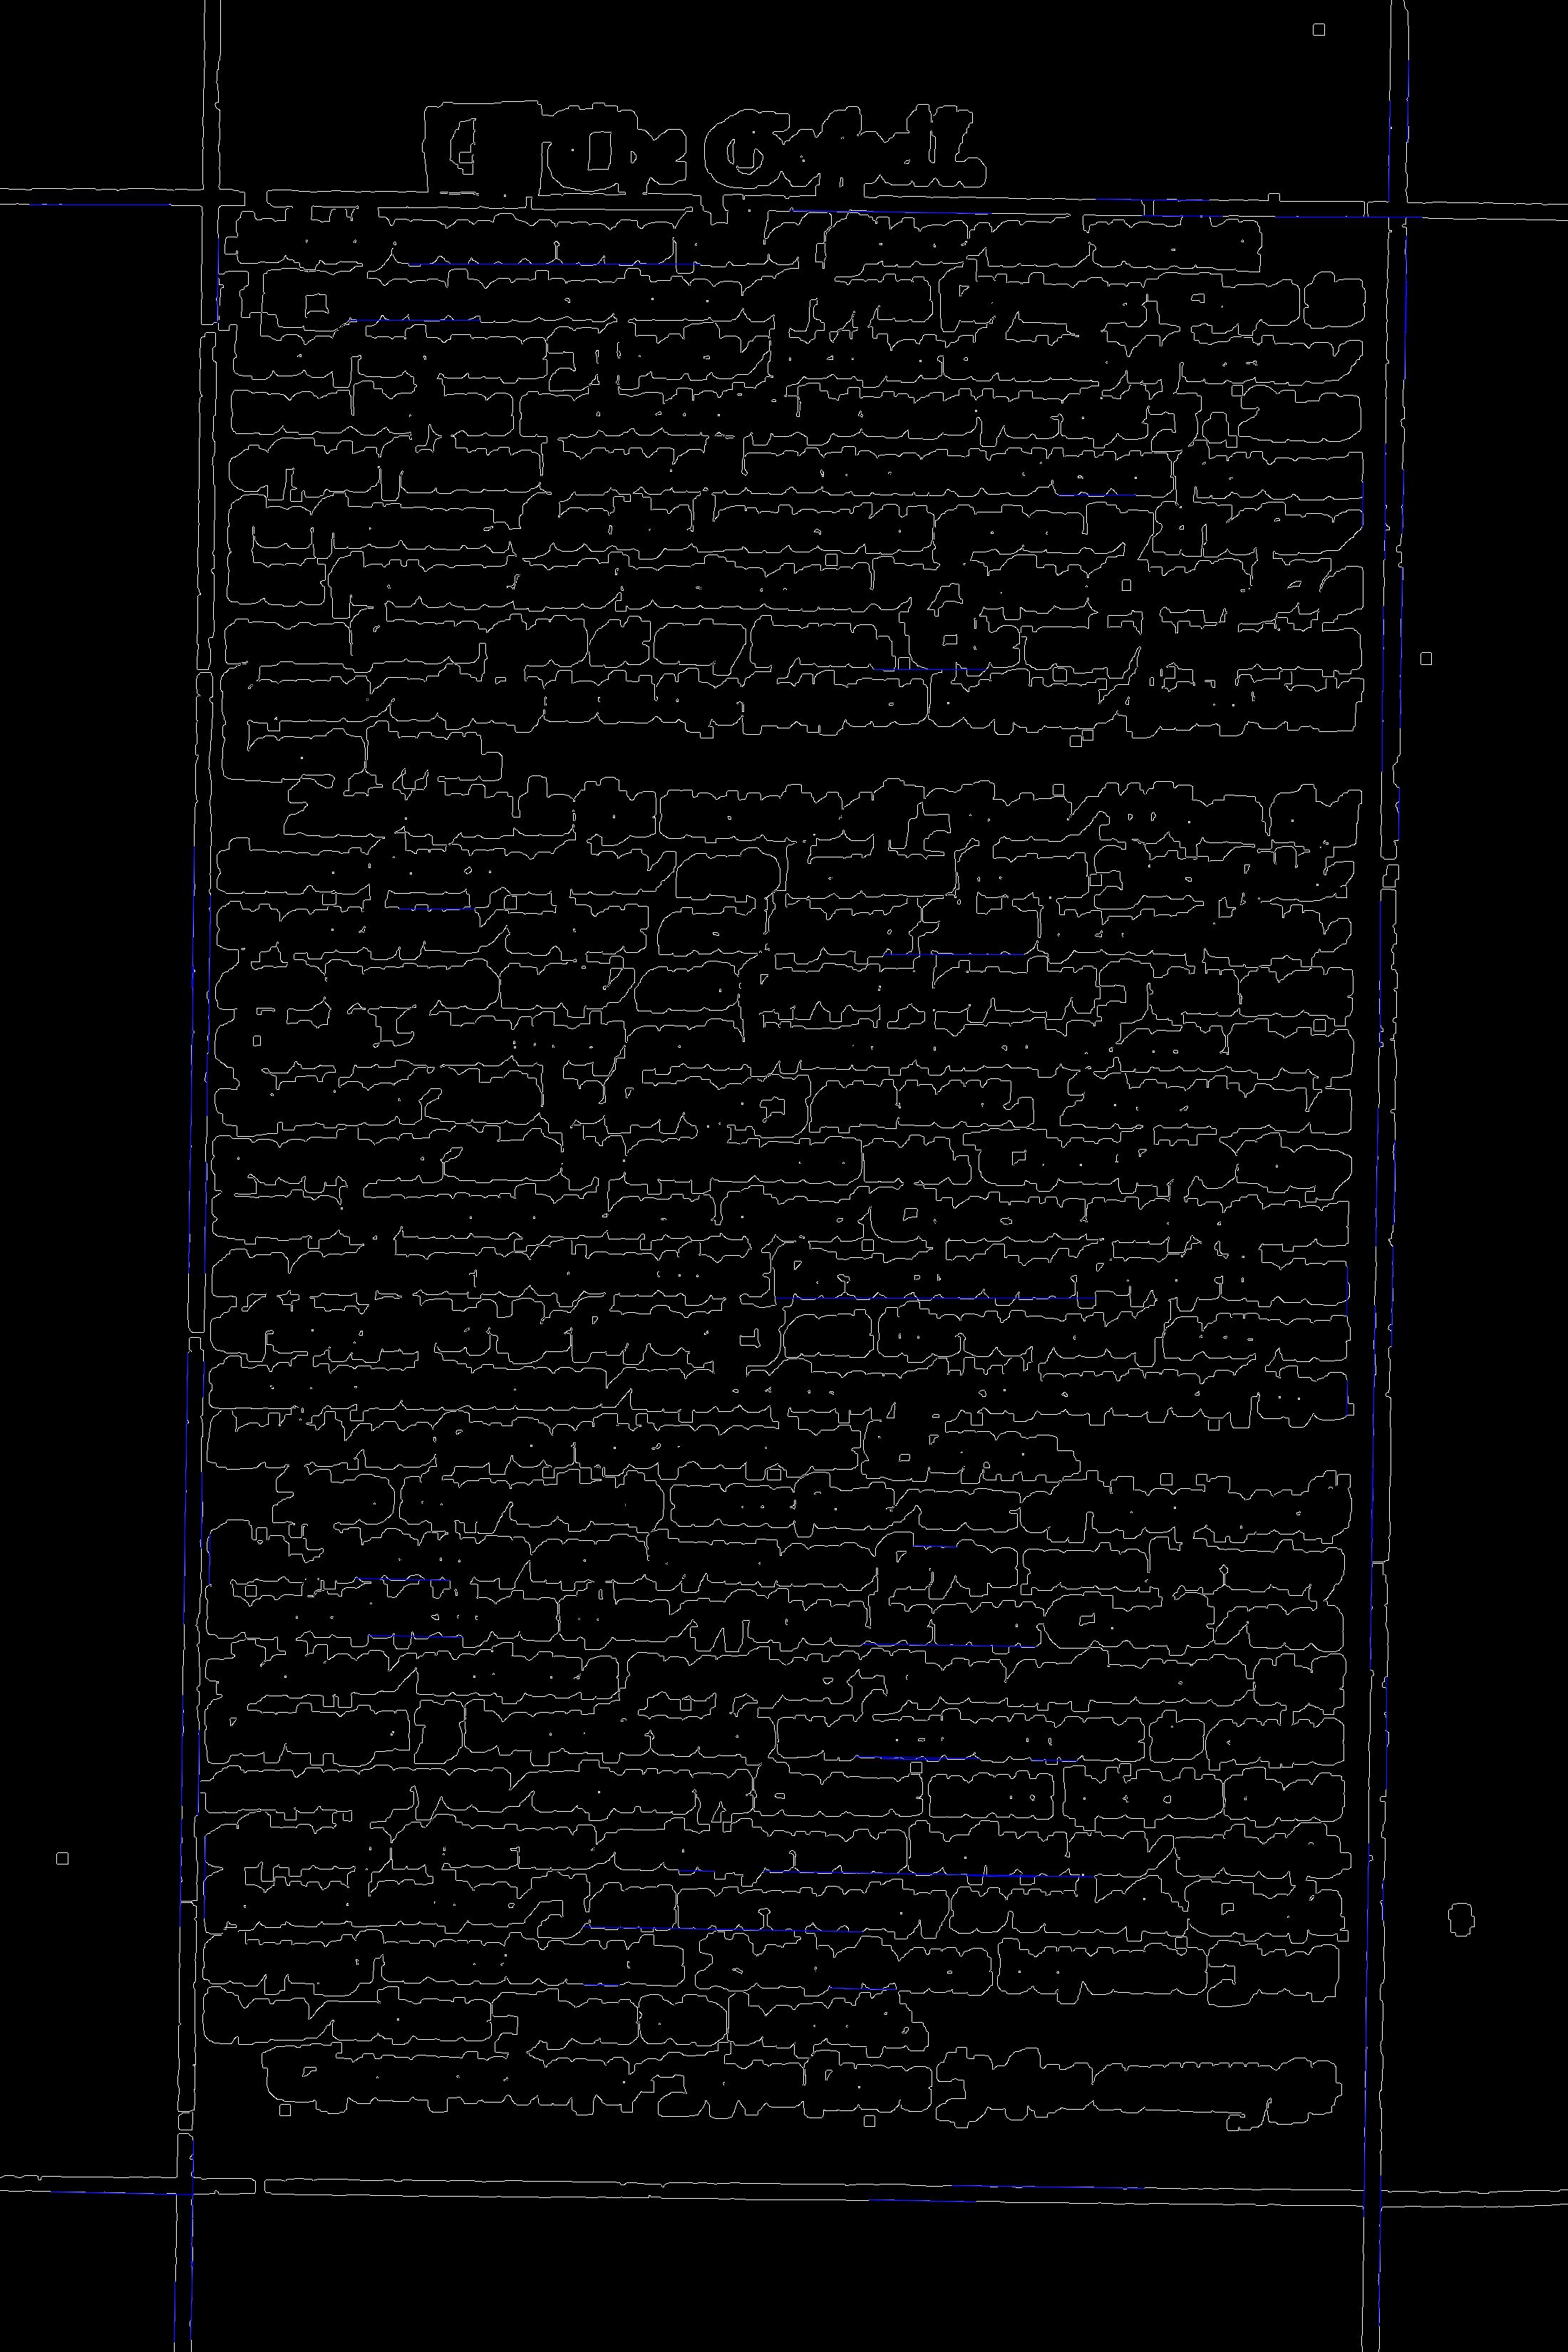

In [27]:
edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
pos = []
neg = []
for i in range(0, len(lines)):
    x1, y1, x2, y2 = lines[i][0]
    pt1 = (x1, y1)
    pt2 = (x2, y2)
    
    angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
    if angle > 0:
        pos.append(angle)
    elif angle < 0:
        neg.append(angle)
    
    cv2.line(edges_bgr, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)
print(sum(pos)/len(pos))
print(sum(neg)/len(neg))
Image.fromarray(edges_bgr)

In [37]:
for f in sorted(glob("1.cropped/*.jpg")):
    img = cv2.imread(f, 0)
    th, img = cv2.threshold(img, 127, 255, 0)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    eroded = cv2.erode(img, kernel, iterations = 7)
    edges = cv2.Canny(eroded, 100, 300, None, 3)
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 200, minLineLength=50, maxLineGap=30)
    pos = []
    neg = []
    for i in range(0, len(lines)):
        x1, y1, x2, y2 = lines[i][0]
        pt1 = (x1, y1)
        pt2 = (x2, y2)

        angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
        if angle > 0:
            pos.append(angle)
        elif angle < 0:
            neg.append(angle)

        cv2.line(edges_bgr, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)

    output = Image.fromarray(edges_bgr)
    output.save(f.replace('1.cropped', '3.lines'))
    
    angle_pos = angle_neg = 0
    if pos:
        angle_avg = sum(pos)/len(pos)
        angle_pos = angle_avg - 90 if angle_avg > 10 else angle_avg
    if neg:
        angle_avg = sum(neg)/len(neg)
        angle_neg = angle_avg + 90 if angle_avg < 10 else angle_avg


#     angle_pos = sum(pos)/len(pos) - 90 if pos else None
#     angle_neg = sum(neg)/len(neg) + 90 if neg else None
    print('{}: {}, {}, {}'.format(f, len(lines), angle_pos, angle_neg))

1.cropped/john0001.jpg: 78, -0.8370975907033085, 6.053992173972389
1.cropped/john0002.jpg: 69, 1.080339207991214, 0.7427086642981493
1.cropped/john0003.jpg: 132, 0.7345210342548154, 0.0
1.cropped/john0004.jpg: 83, 5.022667910634856, 0.5320537178252351
1.cropped/john0005.jpg: 140, 5.218202527665464, 1.827574820853613
1.cropped/john0006.jpg: 156, 0, 0.025230005802171718
1.cropped/john0007.jpg: 256, 0, 0.0
1.cropped/john0008.jpg: 102, 0.8971939186934472, 0.0
1.cropped/john0009.jpg: 71, 0.9789442672282256, 0.600196689217384
1.cropped/john0010.jpg: 93, -0.6820603931726481, 5.237395277583914
1.cropped/john0011.jpg: 179, 0, 7.196911203839861
1.cropped/john0012.jpg: 95, 0.9240453527727062, 0.0
1.cropped/john0013.jpg: 127, -1.309105746291948, 3.537904952607022
1.cropped/john0014.jpg: 62, 0.901453921967453, 0.4534296033204299
1.cropped/john0015.jpg: 146, -44.923913303501685, 1.6524254688411304
1.cropped/john0016.jpg: 53, -78.0924249341221, 0.6410436935924508
1.cropped/john0017.jpg: 118, 1.573224